In [1]:
import torch
import yaml
%load_ext autoreload
%autoreload 2
from InstaAug_module import learnable_invariance
from metadatas import CIFAR_FS
# from data.CIFAR_FS import FewShotDataloader
import matplotlib.pyplot as plt
import numpy as np

/data/erictang000/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
model_path = './experiments/CIFAR_5_shot_query_instacrop_3.5_4/epoch_40.pth'
cfg_path = '/data/erictang000/meta_instance_aug/InstaAug_module/configs/config_crop_supervised_cifar.yaml'

Li_configs=yaml.safe_load(open(cfg_path,'r'))

instance_aug_module = learnable_invariance(Li_configs)
state_dict = torch.load(model_path)
instance_aug_module.load_state_dict(state_dict["li"])

dataset = CIFAR_FS(phase="train", augment='norm', random_cropping=False, color_jitter=False)
# dloader_train = FewShotDataloader(trainset, kway=opt.sample_way, kshot=opt.train_shot, kquery=opt.train_query,
#                                     batch_size=opt.episodes_per_batch, num_workers=0, epoch_size=epoch_s, shuffle=True)

item_indices = []
for i, item in enumerate(dataset):
    if item[1] == 3:
        item_indices.append(i)
images = [dataset[i][0] for i in item_indices[:16]]
# raw_images = [np.array(dataset[i][2]) for i in item_indices[:16]]
fake_batch = torch.cat(images).view(len(images),3,32,32)
instance_augmented, _, _, _= instance_aug_module(fake_batch)



Features dimension: 32
Loading CIFAR-FS dataset - phase train


In [22]:
index=11

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


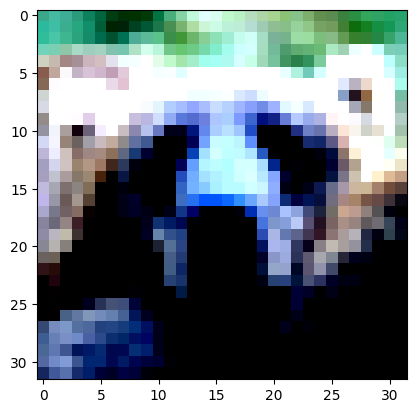

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.transpose(images[index], (1, 2, 0)))
# plt.savefig("bear2.png")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


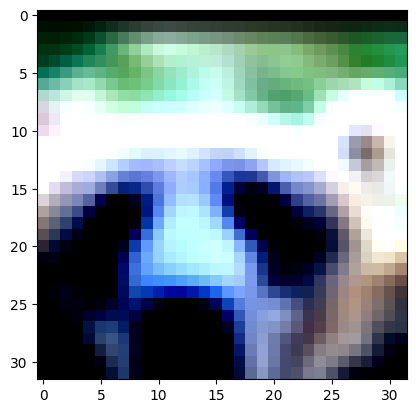

In [25]:
plt.imshow(np.transpose(instance_augmented[index], (1, 2, 0)))
# plt.savefig("bear_jittered2.png")